In [1]:
import sys
sys.path.insert(0, '../')
from models.evaluator import Evaluator
from models.vector_space_model import VectorSpaceModel, SimilarityFunctions
from models.boolean_model import BooleanModel
from utils import read_cacm, preprocess_cacm, read_cacm_query
import numpy as np

import pprint

In [2]:
dictionary = read_cacm('../CACM/cacm.all')
dictionary = preprocess_cacm(dictionary)
query_dict, qrels_dict = read_cacm_query('../CACM/query.text', '../CACM/qrels.text')

vm = VectorSpaceModel(dictionary, sparse=True)

evaluator = Evaluator(vm, query_dict, qrels_dict)

In [3]:
vm.eval(query_dict[1], f_over_k=False)

[(1938, 2.0319960525121146),
 (1752, 2.015211403345941),
 (2319, 1.9080630021710563),
 (1605, 1.8466759799298664),
 (1844, 1.8363193777520337),
 (2218, 1.7724290346795408),
 (1657, 1.758434951636525),
 (1161, 1.7460473611913787),
 (1506, 1.7305277243665258),
 (2380, 1.669113795750397)]

In [4]:
qrels_dict[1]

[1410, 1572, 1605, 2020, 2358]

In [5]:
evaluator.precision_recall_query_all(option='simple', f_over_k=False)

{<SimilarityFunctions.DOT: 1>: (0.26538461538461533, 0.2878521163362492),
 <SimilarityFunctions.DICE: 2>: (0.23901098901098902, 0.1962675228773477),
 <SimilarityFunctions.COSINUS: 3>: (0.24786324786324784, 0.2406461615496777),
 <SimilarityFunctions.JACCARD: 4>: (0.23901098901098902, 0.1962675228773477)}

In [6]:
evaluator.precision_recall_query_all(option='simple', f_over_k=True)

{<SimilarityFunctions.DOT: 1>: (0.23871636582780897, 0.28597989352506814),
 <SimilarityFunctions.DICE: 2>: (0.19012351969461305, 0.20296760427592458),
 <SimilarityFunctions.COSINUS: 3>: (0.3119049238436166, 0.1877256650835647),
 <SimilarityFunctions.JACCARD: 4>: (0.16670321270834332, 0.21715019989301382)}

In [106]:
x = np.arange(1, 100.01, 1).astype(int)
performances = evaluator.precision_recall_range('k', x, 
                                                option='simple')

In [100]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
d = [(i,x,y,z) for x, d1 in performances.items() for y, d2 in d1.items() for i,z in enumerate(d2, start=1)]

In [108]:
x = np.concatenate([x for _ in range(len(d)//x.size)])
x.shape

(1200,)

In [109]:
df = pd.DataFrame(data=d, columns=['k', 'Similarity', 'Measure', 'Value'])
# in case of
df['k'] = x

In [110]:
df2 = df[df['Measure'] == 'f1_score'].drop(columns='Measure')
df2
df2['Similarity'] = df2['Similarity'].apply(lambda x : str(x).split('.')[1])

In [111]:
# Sparse
max_id = [group[1]['Value'].idxmax() for group in df2.groupby('Similarity')]
df2.loc[max_id]

,k,Similarity,Value
808,9,COSINUS,0.244201
506,7,DICE,0.215541
209,10,DOT,0.276162
1106,7,JACCARD,0.215541


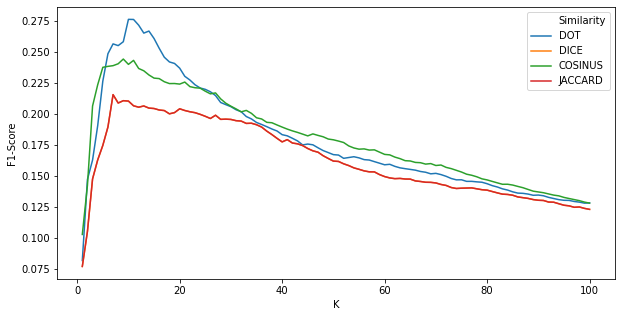

In [98]:
# Sparse
df2.columns = ['K', 'Similarity', 'F1-Score']
plt.figure(figsize=(10,5))
f = sns.lineplot(x='K', y='F1-Score', hue='Similarity', data=df2)
f.get_figure().savefig('k_sims.png', dpi=300)

In [36]:
# Sparse
max_id = [group[1]['Value'].idxmax() for group in df2.groupby('Similarity')]
df2.loc[max_id]

,k,Similarity,Value
215,0.17,COSINUS,0.251781
509,0.11,DICE,0.225492
804,0.06,JACCARD,0.230873


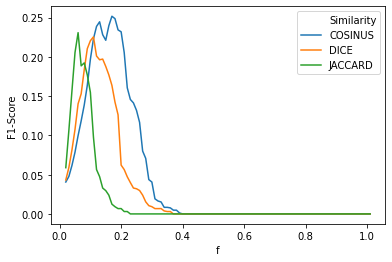

In [38]:
# Sparse
df2.columns = ['f', 'Similarity', 'F1-Score']
f = sns.lineplot(x='f', y='F1-Score', hue='Similarity', data=df2)
f.get_figure().savefig('f_dice_jaccard_cos.png', dpi=300)

In [61]:
# No sparse
max_id = [group[1]['Value'].idxmax() for group in df2.groupby('Similarity')]
df2.loc[max_id]

,k,Similarity,Value
408,9,COSINUS,0.244201
256,7,DICE,0.215541
110,11,DOT,0.270077
556,7,JACCARD,0.215541


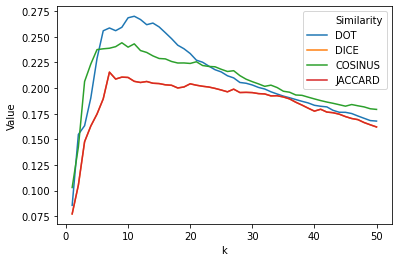

In [52]:
# No sparse
sns.lineplot(x='k', y='Value', hue='Similarity', data=df2)

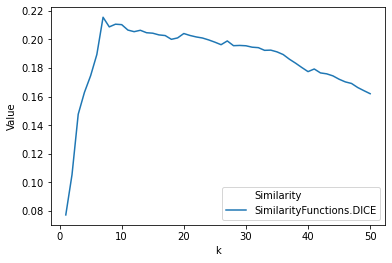

In [25]:
from models.vector_space_model import SimilarityFunctions
sns.lineplot(x='k', y='Value', hue='Similarity', data=df2[df2['Similarity'] == SimilarityFunctions.DICE])

# Temps d'exécution (Modèle booléen)

In [3]:
dictionary = read_cacm('../CACM/cacm.all')
dictionary = preprocess_cacm(dictionary)
query_dict, qrels_dict = read_cacm_query('../CACM/query.text', '../CACM/qrels.text')

vm = VectorSpaceModel(dictionary)

In [5]:
bm = BooleanModel(dictionary)

In [9]:
import random
from timeit import default_timer as timer

In [9]:
l = ""
l.index()

In [53]:
n = 100000
num_max_token = 100
length_time = []
list_tokens = list(bm._dict.keys())
c = 0
operators = ['and', 'or']
for _ in range(n):
    length = (c%num_max_token)+1
    l = random.sample(list_tokens, length)
    l = ''.join(["'" + x + "' " + random.choice(operators) + " " for x in l])
    l = l[:l.rindex("'")+1]
    t1 = timer()
    x = bm.eval(l)
    t2 = timer()
    length_time.append((length, (t2-t1)))
    c += 1

In [ ]:
length_time[1000:1100]

In [28]:
import pandas as pd

In [29]:
df = pd.DataFrame(data=length_time, columns=['Nombre de tokens', "Temps d'exécution (sec)"])

In [30]:
df2 = df.groupby('Nombre de tokens').mean().reset_index()

In [31]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
df2.iloc[99]

Nombre de tokens           100.000000
Temps d'exécution (sec)      0.164669
Name: 99, dtype: float64

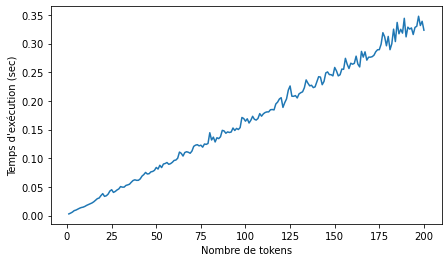

In [32]:
plt.figure(figsize=(7, 4))
f = sns.lineplot(x='Nombre de tokens', y="Temps d'exécution (sec)", data=df2)

In [33]:
f.get_figure().savefig('exec_time_vector.png', dpi=300)

# Temps d'exécution (Modèle vectoriel)

In [47]:
vm = VectorSpaceModel(dictionary, sparse=False)

In [27]:
n = 10000
num_max_token = 200
length_time = []
list_tokens = list(vm._dict.dict.keys())
c = 0
for i in range(n):
    length = (c%num_max_token)+1
    l = ' '.join(random.sample(list_tokens, length))
    t1 = timer()
    x = vm.eval(l)
    t2 = timer()
    length_time.append((length, (t2-t1)))
    c += 1

In [48]:
length_time = []

In [49]:
for _ in range(100):
    length = 100
    l = ' '.join(random.sample(list_tokens, length))
    t1 = timer()
    x = vm.eval(l)
    t2 = timer()
    length_time.append((t2-t1))
    c += 1

In [46]:
np.array(length_time).mean()

0.001115509799996289

In [50]:
np.array(length_time).mean()

0.15157602800000858

# Tests

In [3]:
from models.vector_space_model import SimilarityFunctions
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
qrels_dict[1]

[1410, 1572, 1605, 2020, 2358]

In [6]:
vm.eval(query_dict[1], f=0.5)

[(1938, 2.0319960525121146),
 (1752, 2.015211403345941),
 (2319, 1.9080630021710563),
 (1605, 1.8466759799298664),
 (1844, 1.8363193777520337),
 (2218, 1.7724290346795408),
 (1657, 1.758434951636525),
 (1161, 1.7460473611913787),
 (1506, 1.7305277243665258),
 (2380, 1.669113795750397),
 (1572, 1.6669278878726161),
 (2632, 1.663459975173494),
 (2796, 1.6355527479034948),
 (2597, 1.6355527479034948),
 (1440, 1.6355527479034948),
 (1163, 1.6355527479034948),
 (414, 1.6355527479034948),
 (98, 1.6355527479034948),
 (2629, 1.586626903870152),
 (2344, 1.5782211952871177),
 (2947, 1.5540096745145897),
 (1769, 1.53949466392991),
 (2317, 1.538355056469359),
 (2439, 1.5351320619212054),
 (1410, 1.5240588766245524),
 (1908, 1.5128620168469666),
 (1523, 1.498303588362748),
 (1069, 1.4968708620543598),
 (1315, 1.493271221016207),
 (3127, 1.4932712210162067),
 (3048, 1.4925685726480746),
 (2740, 1.4814868768778453),
 (1236, 1.4429704091214328),
 (1827, 1.4274705832132115),
 (1519, 1.4262637844255943)

In [7]:
query_id = 1
evaluator.precision_recall_query(query_id, SimilarityFunctions.DOT, f=0.5)

([0.0,
  0.0,
  0.0,
  0.25,
  0.2,
  0.16666666666666666,
  0.14285714285714285,
  0.125,
  0.1111111111111111,
  0.1,
  0.18181818181818182,
  0.16666666666666666,
  0.15384615384615385,
  0.14285714285714285,
  0.13333333333333333,
  0.125,
  0.11764705882352941,
  0.1111111111111111,
  0.10526315789473684,
  0.1,
  0.09523809523809523,
  0.09090909090909091,
  0.08695652173913043,
  0.08333333333333333,
  0.12,
  0.11538461538461539,
  0.1111111111111111,
  0.10714285714285714,
  0.10344827586206896,
  0.1,
  0.0967741935483871,
  0.09375,
  0.09090909090909091,
  0.08823529411764706,
  0.08571428571428572,
  0.08333333333333333,
  0.08108108108108109,
  0.07894736842105263,
  0.07692307692307693,
  0.075,
  0.07317073170731707,
  0.07142857142857142,
  0.06976744186046512,
  0.06818181818181818,
  0.06666666666666667,
  0.06521739130434782,
  0.06382978723404255,
  0.0625,
  0.061224489795918366,
  0.06,
  0.058823529411764705,
  0.057692307692307696,
  0.05660377358490566,
  0.05

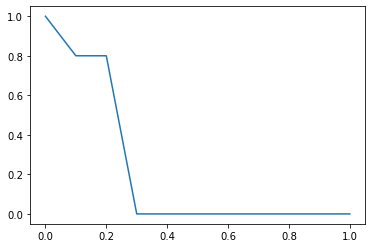

In [41]:
precision, recall = evaluator.precision_recall_query(10, SimilarityFunctions.DOT, interpolate=True, f=1.6)
plt.plot(recall, precision)

In [27]:
d = evaluator.precision_recall_query_all(f=0.05, interpolate=True)

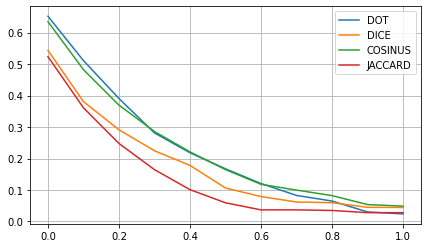

In [28]:
l = []
plt.figure(figsize=(7,4))
plt.grid(True)
for sim in d:
    p, r = d[sim]
    plt.plot(r, p, label=str(sim).split('.')[-1])
plt.legend()
plt.savefig('mean_pr.png', dpi=300)

In [9]:
df = pd.DataFrame(data=l, columns=['Similarity', 'Recall', 'Precision'])

,Similarity,Recall,Precision
0,DOT,0.0,"[0.6521496193864613, 0.51115376979461, 0.39071..."
1,DOT,0.1,"[0.0, 0.09999999999999995, 0.1999999999999999,..."
2,DICE,0.0,"[0.5437381986918542, 0.3808775294531785, 0.291..."
3,DICE,0.1,"[0.0, 0.09999999999999995, 0.1999999999999999,..."
4,COSINUS,0.0,"[0.6349363559519704, 0.48230829043570606, 0.36..."
5,COSINUS,0.1,"[0.0, 0.09999999999999995, 0.1999999999999999,..."
6,JACCARD,0.0,"[0.5237918265132139, 0.3611410766654919, 0.247..."
7,JACCARD,0.1,"[0.0, 0.09999999999999995, 0.1999999999999999,..."


TypeError: unhashable type: 'numpy.ndarray'

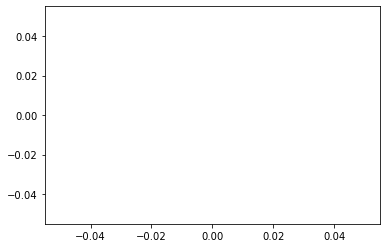

In [8]:
sns.lineplot(x='Recall', y='Precision', hue='Similarity', data=df)

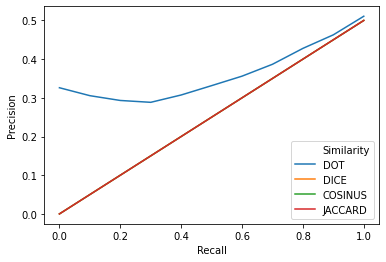

In [17]:
sns.lineplot(x='Recall', y='Precision', hue='Similarity', data=df)

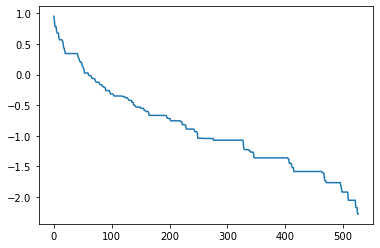

In [20]:
res = vm.eval(query_dict[3], k=-1)
l = np.array([x for _,x in res])
plt.plot(np.log(l))

In [32]:
d = evaluator.precision_recall_k('k', range(1,51), sims=[SimilarityFunctions.DOT])

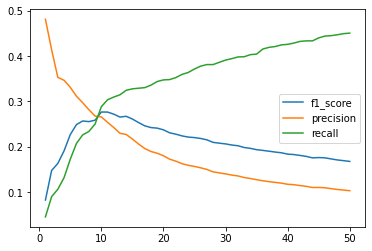

In [42]:
plt.plot(np.arange(1, 51, 1), d[SimilarityFunctions.DOT]['f1_score'], label="f1_score")
plt.plot(np.arange(1, 51, 1), d[SimilarityFunctions.DOT]['mean_precision'], label="precision")
plt.plot(np.arange(1, 51, 1), d[SimilarityFunctions.DOT]['mean_recall'], label='recall')
plt.legend()

In [35]:
d

{<SimilarityFunctions.DOT: 1>: {'mean_precision': [0.4807692307692308,
   0.41346153846153844,
   0.3525641025641026,
   0.34615384615384615,
   0.33076923076923076,
   0.3108974358974359,
   0.29670329670329665,
   0.28125,
   0.2670940170940171,
   0.2653846153846154,
   0.2534965034965035,
   0.2419871794871795,
   0.22928994082840234,
   0.2266483516483516,
   0.21666666666666665,
   0.20552884615384615,
   0.19570135746606335,
   0.18910256410256407,
   0.1852226720647773,
   0.17980769230769234,
   0.17216117216117213,
   0.16783216783216778,
   0.16220735785953175,
   0.15865384615384615,
   0.15615384615384614,
   0.15310650887573965,
   0.1495726495726496,
   0.14423076923076922,
   0.14190981432360744,
   0.13974358974358975,
   0.13709677419354838,
   0.13521634615384615,
   0.13170163170163168,
   0.12952488687782807,
   0.12692307692307694,
   0.12446581196581197,
   0.12266112266112267,
   0.12095141700404857,
   0.11932938856015778,
   0.11682692307692308,
   0.115853658

In [43]:
np.log2(9)

3.169925001442312